*Dependency installation*

Install cx_Oracle python package with anaconda prompt
```
conda install -c anaconda cx_oracle
```

In [5]:
import cx_Oracle as db

#database user credentials
user="chandler"
password="chandler"

#creating connection string
connectionString = user+'/'+password+'@localhost'

#connection established with database
con = db.connect(connectionString)
cursor = con.cursor()

In [2]:
import pandas as pd

#import Mc'DonaldsMenu.csv file and create a dataframe
data = pd.read_csv("""./Mc'DonaldsMenu.csv""")
dataFrame = pd.DataFrame(data)

#list of dataFrame column headers
dataFrameHeaders=[
    'Category',
    'Item',
    'Serving Size',
    'Calories',
    'Calories from Fat',
    'Total Fat',
    'Total Fat (% Daily Value)',
    'Saturated Fat',
    'Saturated Fat (% Daily Value)',
    'Trans Fat',
    'Cholesterol',
    'Cholesterol (% Daily Value)',
    'Sodium',
    'Sodium (% Daily Value)',
    'Carbohydrates',
    'Carbohydrates (% Daily Value)',
    'Dietary Fiber',
    'Dietary Fiber (% Daily Value)',
    'Sugars',
    'Protein',
    'Vitamin A (% Daily Value)',
    'Vitamin C (% Daily Value)',
    'Calcium (% Daily Value)',
    'Iron (% Daily Value)'
]

print(dataFrameHeaders)
print("csv successfully imported")

['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber', 'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']
csv successfully imported


In [3]:
# A map for csv column headers and column names in database table
tableNameMap={
    'Category':'category',
    'Item':'item',
    'Serving Size':'serving_size',
    'Calories':'calories',
    'Calories from Fat':'calories_fat',
    'Total Fat':'total_fat',
    'Total Fat (% Daily Value)':'total_fat_percent',
    'Saturated Fat':'saturated_fat',
    'Saturated Fat (% Daily Value)':'saturated_fat_percent',
    'Trans Fat':'trans_fat',
    'Cholesterol':'cholesterol',
    'Cholesterol (% Daily Value)':'cholesterol_percent',
    'Sodium':'sodium',
    'Sodium (% Daily Value)':'sodium_percent',
    'Carbohydrates':'carbohydrates',
    'Carbohydrates (% Daily Value)':'carbohydrates_percent',
    'Dietary Fiber':'dietary_fiber',
    'Dietary Fiber (% Daily Value)':'dietary_fiber_percent',
    'Sugars':'sugars',
    'Protein':'proteins',
    'Vitamin A (% Daily Value)':'vitamin_A_percent',
    'Vitamin C (% Daily Value)':'vitamin_C_percent',
    'Calcium (% Daily Value)':'calcium_percent',
    'Iron (% Daily Value)':'iron_percent'
}
print(tableNameMap)

{'Category': 'category', 'Item': 'item', 'Serving Size': 'serving_size', 'Calories': 'calories', 'Calories from Fat': 'calories_fat', 'Total Fat': 'total_fat', 'Total Fat (% Daily Value)': 'total_fat_percent', 'Saturated Fat': 'saturated_fat', 'Saturated Fat (% Daily Value)': 'saturated_fat_percent', 'Trans Fat': 'trans_fat', 'Cholesterol': 'cholesterol', 'Cholesterol (% Daily Value)': 'cholesterol_percent', 'Sodium': 'sodium', 'Sodium (% Daily Value)': 'sodium_percent', 'Carbohydrates': 'carbohydrates', 'Carbohydrates (% Daily Value)': 'carbohydrates_percent', 'Dietary Fiber': 'dietary_fiber', 'Dietary Fiber (% Daily Value)': 'dietary_fiber_percent', 'Sugars': 'sugars', 'Protein': 'proteins', 'Vitamin A (% Daily Value)': 'vitamin_A_percent', 'Vitamin C (% Daily Value)': 'vitamin_C_percent', 'Calcium (% Daily Value)': 'calcium_percent', 'Iron (% Daily Value)': 'iron_percent'}


In [6]:
# table creation query

query="""create table mc_donalds_menu(category varchar(100),item varchar(150), serving_size varchar(100),calories number(5),calories_fat number(5),total_fat number(5),total_fat_percent number(5),saturated_fat number(5),saturated_fat_percent number(5),trans_fat number(5),cholesterol number(5),cholesterol_percent number(5),sodium number(5),sodium_percent number(5),carbohydrates number(5),carbohydrates_percent number(5),dietary_fiber number(5),dietary_fiber_percent number(5),sugars number(5),proteins number(5),vitamin_A_percent number(5),vitamin_C_percent number(5),calcium_percent number(5),iron_percent number(5))"""

cursor.execute(query)

After execution of above code perform following command in sql cmd

```
    desc mc_donalds_menu
```

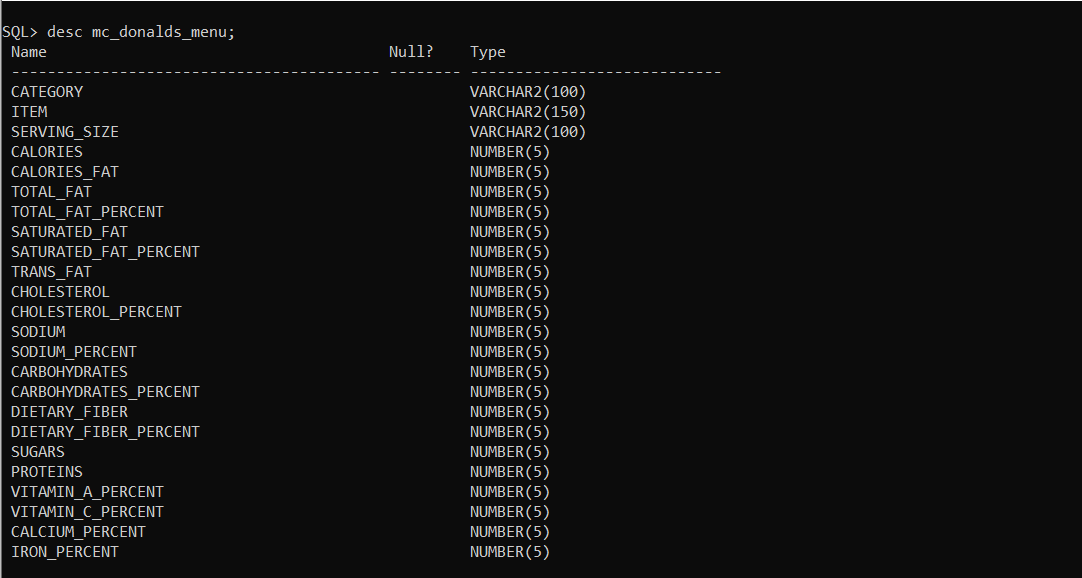

In [8]:
#insert values into database from csv

for index in dataFrame.index:
    s=""
    for factor in range(3):
        v=str(dataFrame[dataFrameHeaders[factor]][index])
        s=s+"'"+v+"'"+','
    
    for factor in range(3,23):
        v=str(dataFrame[dataFrameHeaders[factor]][index])
        s=s+v+','
    v=str(dataFrame['Iron (% Daily Value)'][index])
    s=s+v
    #print(s)
    
    baseQuery="insert into mc_donalds_menu values("
    finalQuery=baseQuery+s+")"
    print(finalQuery)
    print()
    cursor.execute(finalQuery)
    
print("done")
cursor.execute("commit")

insert into mc_donalds_menu values('Breakfast','Egg McMuffin','4.8 oz (136 g)',300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15)

insert into mc_donalds_menu values('Breakfast','Egg White Delight','4.8 oz (135 g)',250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8)

insert into mc_donalds_menu values('Breakfast','Sausage McMuffin','3.9 oz (111 g)',370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10)

insert into mc_donalds_menu values('Breakfast','Sausage McMuffin with Egg','5.7 oz (161 g)',450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15)

insert into mc_donalds_menu values('Breakfast','Sausage McMuffin with Egg Whites','5.7 oz (161 g)',400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10)

insert into mc_donalds_menu values('Breakfast','Steak & Egg McMuffin','6.5 oz (185 g)',430,210,23.0,36,9.0,46,1.0,300,100,960,40,31,10,4,18,3,26,15,2,30,20)

insert into mc_donalds_menu values('Breakfast','Bacon & Egg & Ch

insert into mc_donalds_menu values('Coffee & Tea','Hazelnut Latte (Large)','20 fl oz cup',430,120,14.0,21,8.0,39,0.0,40,14,180,8,62,21,1,6,58,15,15,0,50,2)

insert into mc_donalds_menu values('Coffee & Tea','French Vanilla Latte (Small)','12 fl oz cup',260,80,9.0,13,5.0,24,0.0,25,9,115,5,38,13,1,3,36,9,8,0,30,0)

insert into mc_donalds_menu values('Coffee & Tea','French Vanilla Latte (Medium)','16 fl oz cup',330,90,10.0,16,6.0,30,0.0,30,11,140,6,48,16,1,4,45,11,10,0,35,2)

insert into mc_donalds_menu values('Coffee & Tea','French Vanilla Latte (Large)','20 fl oz cup',420,120,14.0,21,8.0,39,0.0,40,14,190,8,60,20,1,6,56,15,15,0,50,2)

insert into mc_donalds_menu values('Coffee & Tea','Latte with Sugar Free French Vanilla Syrup (Small)','12 fl oz cup',210,80,9.0,13,5.0,24,0.0,25,9,150,6,24,8,1,4,12,9,8,0,30,0)

insert into mc_donalds_menu values('Coffee & Tea','Latte with Sugar Free French Vanilla Syrup (Medium)','16 fl oz cup',260,90,10.0,16,6.0,30,0.0,30,11,190,8,29,10,1,5,15,12,10,0,35

In [10]:
#test the data
query="select item from mc_donalds_menu where category='Beef & Pork'"

cursor.execute(query)

for row in cursor:
    print(row)

('Big Mac',)
('Quarter Pounder with Cheese',)
('Quarter Pounder with Bacon & Cheese',)
('Quarter Pounder with Bacon Habanero Ranch',)
('Quarter Pounder Deluxe',)
('Double Quarter Pounder with Cheese',)
('Hamburger',)
('Cheeseburger',)
('Double Cheeseburger',)
('Bacon Clubhouse Burger',)
('McDouble',)
('Bacon McDouble',)
('Daily Double',)
('Jalapeño Double',)
('McRib',)
('Big Mac',)
('Quarter Pounder with Cheese',)
('Quarter Pounder with Bacon & Cheese',)
('Quarter Pounder with Bacon Habanero Ranch',)
('Quarter Pounder Deluxe',)
('Double Quarter Pounder with Cheese',)
('Hamburger',)
('Cheeseburger',)
('Double Cheeseburger',)
('Bacon Clubhouse Burger',)
('McDouble',)
('Bacon McDouble',)
('Daily Double',)
('Jalapeño Double',)
('McRib',)
